# Ingénierie des Modèles et Langages Spécifiques aux Domaines 

## Auteurs

* Eric BOUDIN
* Clément MONESTIER
* Florian NAUD
* Lucas RAKOTOMALALA
* Loïc RIZZO

## Sujet

Sujet 1 - OpenML Analysis

### Question générale

Quelle est la relation entre les algorithmes, préprocesseurs et leur utilisation dans les séries temporelles ?

### Sous questions

1. Quelles études sont réalisées sur des séries temporelles ? Quels sont les principaux types de tâches sur ces données en OpenML (Classification, clustering, détection d'anomalies) ?
2. Quels sont les algorithmes et prétraitements les plus fréquemment utilisés ? Dans quel ordre ces algorithmes sont-ils appelés ? Peut-on identifier des sous-workflows, des occurrences conjointes des mêmes algorithmes ?
4. Existe-t-il des algorithmes qui ne sont utilisés que sur les séries temporelles ?

Pour répondre à nos questions, nous disposons de plusieurs *datasets* de séries temporelles :

- [JapaneseVowels](https://www.openml.org/d/375)
- [synthetic_control](https://www.openml.org/d/377)
- [diggle_table_a2](https://www.openml.org/d/694)
- [SONAR](https://www.openml.org/d/40)
- [rmftsa_sleepdata](https://www.openml.org/d/679)
- [ipums_la_97-small](https://www.openml.org/d/382)
- [lsvt](https://www.openml.org/d/1484)
- [gas-drift-different-concentrations](https://www.openml.org/d/1477)
- [newton_hema](https://www.openml.org/d/492)
- [ipums_la_98-small](https://www.openml.org/d/381)

## Imports

In [ ]:
!pip install openml

     |████████████████████████████████| 119 kB 5.4 MB/s 
     |████████████████████████████████| 75 kB 4.2 MB/s 
  Created wheel for openml: filename=openml-0.12.2-py3-none-any.whl size=137326 sha256=2b956523e7c6897da8e5d1065637898d8986c14c09c7feb37fe1e4e1ed1af515
  Stored in directory: /root/.cache/pip/wheels/6a/20/88/cf4ac86aa18e2cd647ed16ebe274a5dacee9d0075fa02af250
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=b5dbe6068da389bb0ae19d806ee4f13c3f7350d2b7be1eb1bc205d1563d0448a
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff


In [ ]:
import json

import openml as ml
from openml.tasks import TaskType
from openml.flows import OpenMLFlow
import pandas as pd
import pprint
import matplotlib.pyplot as plt

# Import packages for data visualization
import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx

Config plot

In [ ]:
font = {'family' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

## Traitement des données d'`OpenML`

### Exemples

#### Obtenir les differents types de tâches

In [ ]:
for task in TaskType:
  tasks = ml.tasks.list_tasks(task_type=task)
  print(task.name, len(tasks))

SUPERVISED_CLASSIFICATION 3749
SUPERVISED_REGRESSION 2487
LEARNING_CURVE 2553
SUPERVISED_DATASTREAM_CLASSIFICATION 912
CLUSTERING 33019
MACHINE_LEARNING_CHALLENGE 2
SURVIVAL_ANALYSIS 4
SUBGROUP_DISCOVERY 3745
MULTITASK_REGRESSION 0


'\nExpected (26/01/2021):\nSUPERVISED_CLASSIFICATION 3744\nSUPERVISED_REGRESSION 2483\nLEARNING_CURVE 2553\nSUPERVISED_DATASTREAM_CLASSIFICATION 912\nCLUSTERING 33018\nMACHINE_LEARNING_CHALLENGE 2\nSURVIVAL_ANALYSIS 4\nSUBGROUP_DISCOVERY 3745\nMULTITASK_REGRESSION 0\n'

#### Obtenir les tâches de type `SUPERVISED_CLASSIFICATION`

In [ ]:
tasks = ml.tasks.list_tasks(task_type=TaskType.SUPERVISED_CLASSIFICATION)
tasks = pd.DataFrame.from_dict(tasks, orient='index')
pd.set_option('max_columns', 30)
print(tasks.columns)
print(tasks.head())

Index(['tid', 'ttid', 'did', 'name', 'task_type', 'status',
       'estimation_procedure', 'evaluation_measures', 'source_data',
       'target_feature', 'MajorityClassSize', 'MaxNominalAttDistinctValues',
       'MinorityClassSize', 'NumberOfClasses', 'NumberOfFeatures',
       'NumberOfInstances', 'NumberOfInstancesWithMissingValues',
       'NumberOfMissingValues', 'NumberOfNumericFeatures',
       'NumberOfSymbolicFeatures', 'cost_matrix'],
      dtype='object')
   tid                                ttid  did        name  \
2    2  TaskType.SUPERVISED_CLASSIFICATION    2      anneal   
3    3  TaskType.SUPERVISED_CLASSIFICATION    3    kr-vs-kp   
4    4  TaskType.SUPERVISED_CLASSIFICATION    4       labor   
5    5  TaskType.SUPERVISED_CLASSIFICATION    5  arrhythmia   
6    6  TaskType.SUPERVISED_CLASSIFICATION    6      letter   

                   task_type  status     estimation_procedure  \
2  Supervised Classification  active  10-fold Crossvalidation   
3  Supervised Classi

## Quels sont les principaux types de tâches sur les séries temporelles sur `OpenML` (*classification*, *clustering*, *détection d'anomalies*) ?

### [JapaneseVowels](https://www.openml.org/d/375)

- Obtention de la liste des tâches du DataSet

In [ ]:
# Obtient la liste des tâches
tasks = ml.tasks.list_tasks(data_id=375)
tasks = pd.DataFrame.from_dict(tasks, orient='index')
print('Nombre de tâches :')
print(len(tasks))
print(pprint.pprint(tasks))

tasks.to_json(path_or_buf='/content/tasks_JapaneseVowels.json',orient='index')

Nombre de tâches :
54
           tid  ... number_samples
3510      3510  ...            NaN
4215      4215  ...            NaN
6803      6803  ...            NaN
53999    53999  ...            NaN
54000    54000  ...            NaN
54001    54001  ...            NaN
54002    54002  ...            NaN
54003    54003  ...            NaN
54004    54004  ...            NaN
54005    54005  ...            NaN
54006    54006  ...            NaN
54007    54007  ...            NaN
54008    54008  ...            NaN
54009    54009  ...            NaN
54010    54010  ...            NaN
54011    54011  ...            NaN
54012    54012  ...            NaN
54013    54013  ...            NaN
54014    54014  ...            NaN
54015    54015  ...            NaN
54016    54016  ...            NaN
54017    54017  ...            NaN
54018    54018  ...            NaN
54019    54019  ...            NaN
54020    54020  ...            NaN
54021    54021  ...            NaN
54022    54022  ...            Na

- Obtention de la liste des *run* pour les id d'une tâche donnée

In [ ]:
"""
Obtention de la liste des *run* pour les id d'une tâche donnée
"""
runs = ml.runs.list_runs(task=tasks['tid'].tolist())
runs = pd.DataFrame.from_dict(runs, orient='index')
print('Tous les runs :')
print(pprint.pprint(runs))

runs.to_json(path_or_buf='/content/runs_JapaneseVowels.json',orient='index')

Tous les runs :
          run_id  task_id  ...          upload_time  error_message
169891    169891     3510  ...  2015-02-20 09:47:41               
170934    170934     3510  ...  2015-02-20 11:24:42               
172129    172129     3510  ...  2015-02-20 12:48:33               
173556    173556     3510  ...  2015-02-21 12:14:34               
176203    176203     3510  ...  2015-02-21 16:33:27               
...          ...      ...  ...                  ...            ...
1838976  1838976   125854  ...  2016-11-09 17:05:52               
1839060  1839060   125854  ...  2016-11-09 17:52:58               
1839221  1839221   125854  ...  2016-11-10 11:20:52               
1839341  1839341   125854  ...  2016-11-13 23:43:31               
1839410  1839410   125854  ...  2016-11-15 10:15:14               

[23117 rows x 8 columns]
None


- Obtention du nombre de tâches uniques **exécutées**

In [ ]:
"""
Obtient le nombre de tâches uniques **exécutées** pour un dataset donné
"""
count_task_type = runs.filter(items=['task_id', 'task_type']).drop_duplicates('task_id', keep='first')[
    'task_type'].value_counts()
pprint.pprint(count_task_type)

TaskType.SUBGROUP_DISCOVERY           9
TaskType.SUPERVISED_CLASSIFICATION    2
TaskType.LEARNING_CURVE               1
Name: task_type, dtype: int64


Index([       TaskType.SUBGROUP_DISCOVERY, TaskType.SUPERVISED_CLASSIFICATION,
                  TaskType.LEARNING_CURVE],
      dtype='object')
<PandasArray>
[9, 2, 1]
Length: 3, dtype: int64


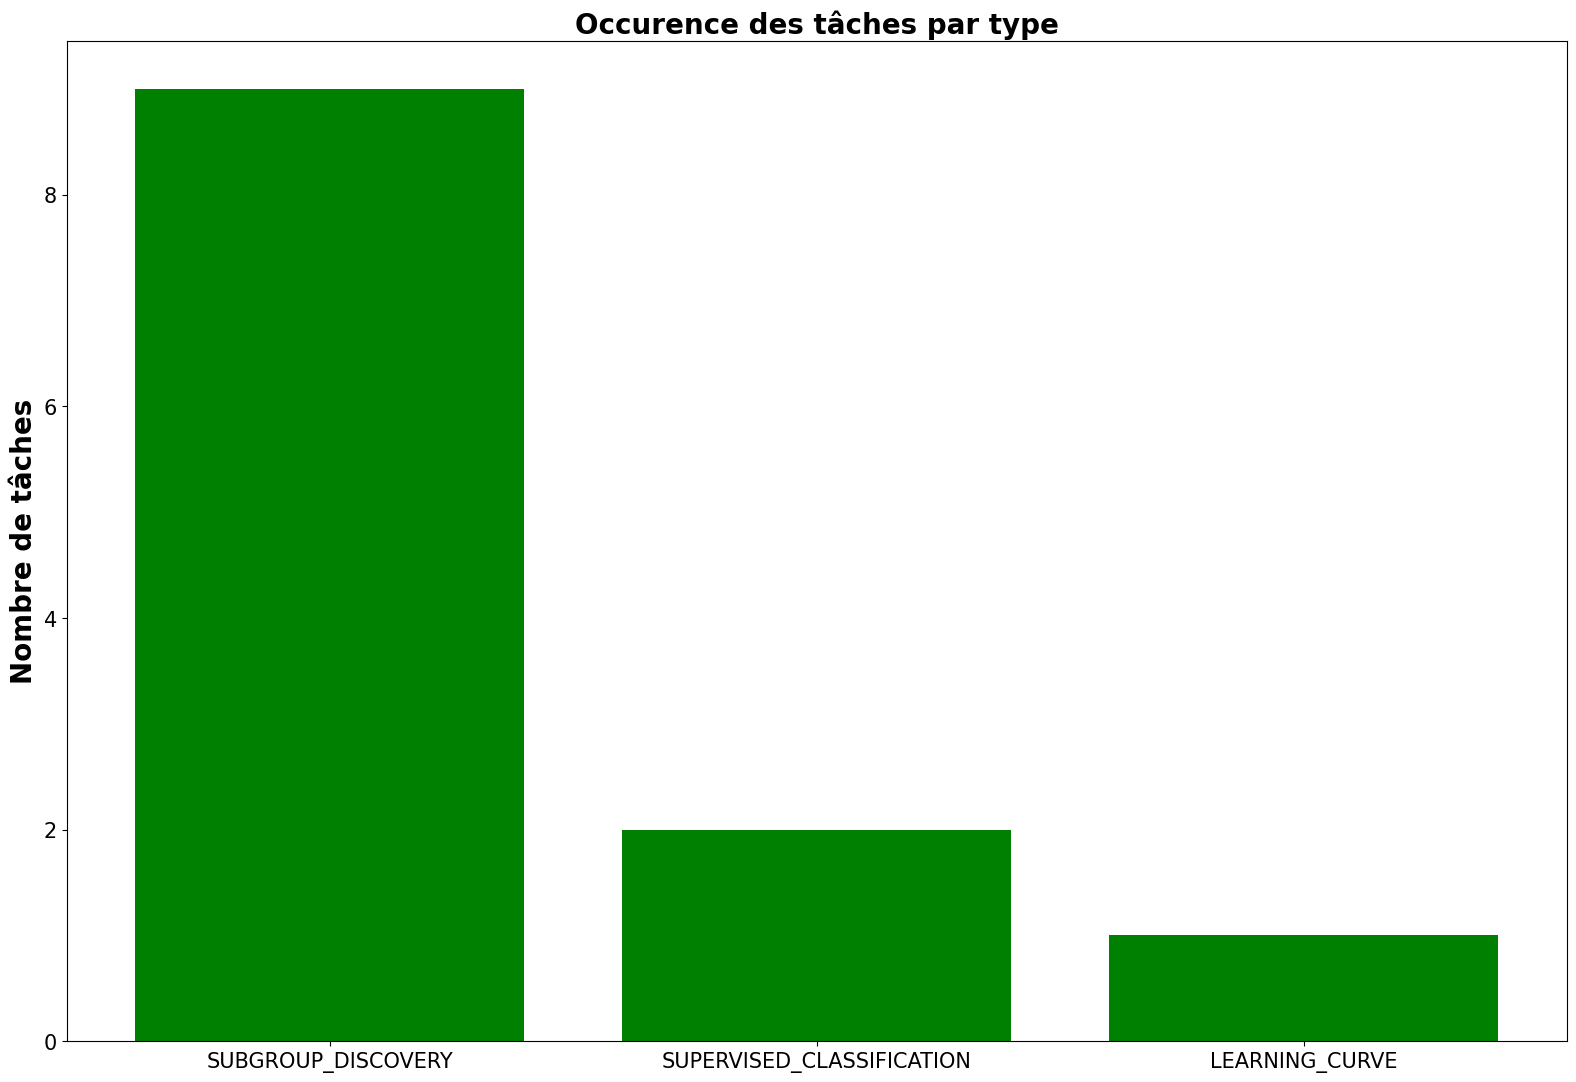

In [ ]:
font = {'family' : 'normal',
        'size'   : 15}

plt.rc('font', **font)


fig_task_jv = plt.figure()
ax_task_jv = fig_task_jv.add_axes([0, 0, 1, 1])
pprint.pprint(count_task_type.index)
x = [str(object_name.name) for object_name in count_task_type.index]
pprint.pprint(count_task_type.array)
ax_task_jv.bar(x, count_task_type.array,
                width=0.8, color=['green'])
ax_task_jv.set_ylabel('Nombre de tâches', weight='bold', size=20)
ax_task_jv.set_title("Occurence des tâches par type", weight='bold', size=20)
fig_task_jv.set_size_inches(15, 10, forward=True)
fig_task_jv.set_dpi(100)
plt.savefig('task_type_on_JapaneseVowels.png')
plt.show()



### Tous les datasets

In [ ]:
"""
Obtient la liste des tâches
"""
list_data_set = [375, 377, 694, 40, 679, 382, 1484, 1477, 492, 381]
tasks = pd.DataFrame()
for dataset in list_data_set:
    tasks_append = pd.DataFrame.from_dict(
        ml.tasks.list_tasks(data_id=dataset),
        orient="index"
    )
    tasks = tasks.append(tasks_append)
print("Nombre de tâches : ")
print(len(tasks))
pprint.pprint(tasks)

tasks.to_json(path_or_buf='/content/tasks_all_times_series.json',orient='index')

Nombre de tâches : 
220
           tid  ... number_samples
3510      3510  ...            NaN
4215      4215  ...            NaN
6803      6803  ...            NaN
53999    53999  ...            NaN
54000    54000  ...            NaN
...        ...  ...            ...
254843  254843  ...            NaN
254854  254854  ...            NaN
296760  296760  ...            NaN
317887  317887  ...            NaN
339042  339042  ...            NaN

[220 rows x 23 columns]


In [ ]:
"""
Obtient la liste des run pour les id de tâche donné
"""
runs = ml.runs.list_runs(task=tasks['tid'].tolist())
runs = pd.DataFrame.from_dict(runs, orient="index")
print("Tous les runs : ")
pprint.pprint(runs)

runs.to_json(path_or_buf='/content/runs_all_times_series.json',orient='index')

"""
Obtient le nombre de tâches uniques **exécutées** pour un dataset donné
"""
pprint.pprint(runs)
count_task_type = runs.filter(items=['task_id', 'task_type']).drop_duplicates('task_id', keep='first')[
    'task_type'].value_counts()
pprint.pprint(count_task_type)

Tous les runs : 
          run_id  task_id  ...          upload_time  error_message
12            12       39  ...  2014-04-06 23:42:09               
27            27       39  ...  2014-04-06 23:46:34               
60            60       39  ...  2014-04-06 23:57:16               
111          111       39  ...  2014-04-07 00:25:17               
310          310       39  ...  2014-04-07 03:29:43               
...          ...      ...  ...                  ...            ...
8888811  8888811   146069  ...  2018-03-26 18:45:13               
8889739  8889739   146069  ...  2018-03-26 19:50:45               
8889818  8889818   146069  ...  2018-03-26 19:55:38               
8893130  8893130   146069  ...  2018-03-27 11:26:57               
8896037  8896037   146069  ...  2018-03-28 20:12:19               

[47854 rows x 8 columns]
          run_id  task_id  ...          upload_time  error_message
12            12       39  ...  2014-04-06 23:42:09               
27            27   

Index([           TaskType.SUPERVISED_CLASSIFICATION,
                         TaskType.SUBGROUP_DISCOVERY,
                             TaskType.LEARNING_CURVE,
       TaskType.SUPERVISED_DATASTREAM_CLASSIFICATION,
                      TaskType.SUPERVISED_REGRESSION],
      dtype='object')
<PandasArray>
[21, 15, 3, 1, 1]
Length: 5, dtype: int64


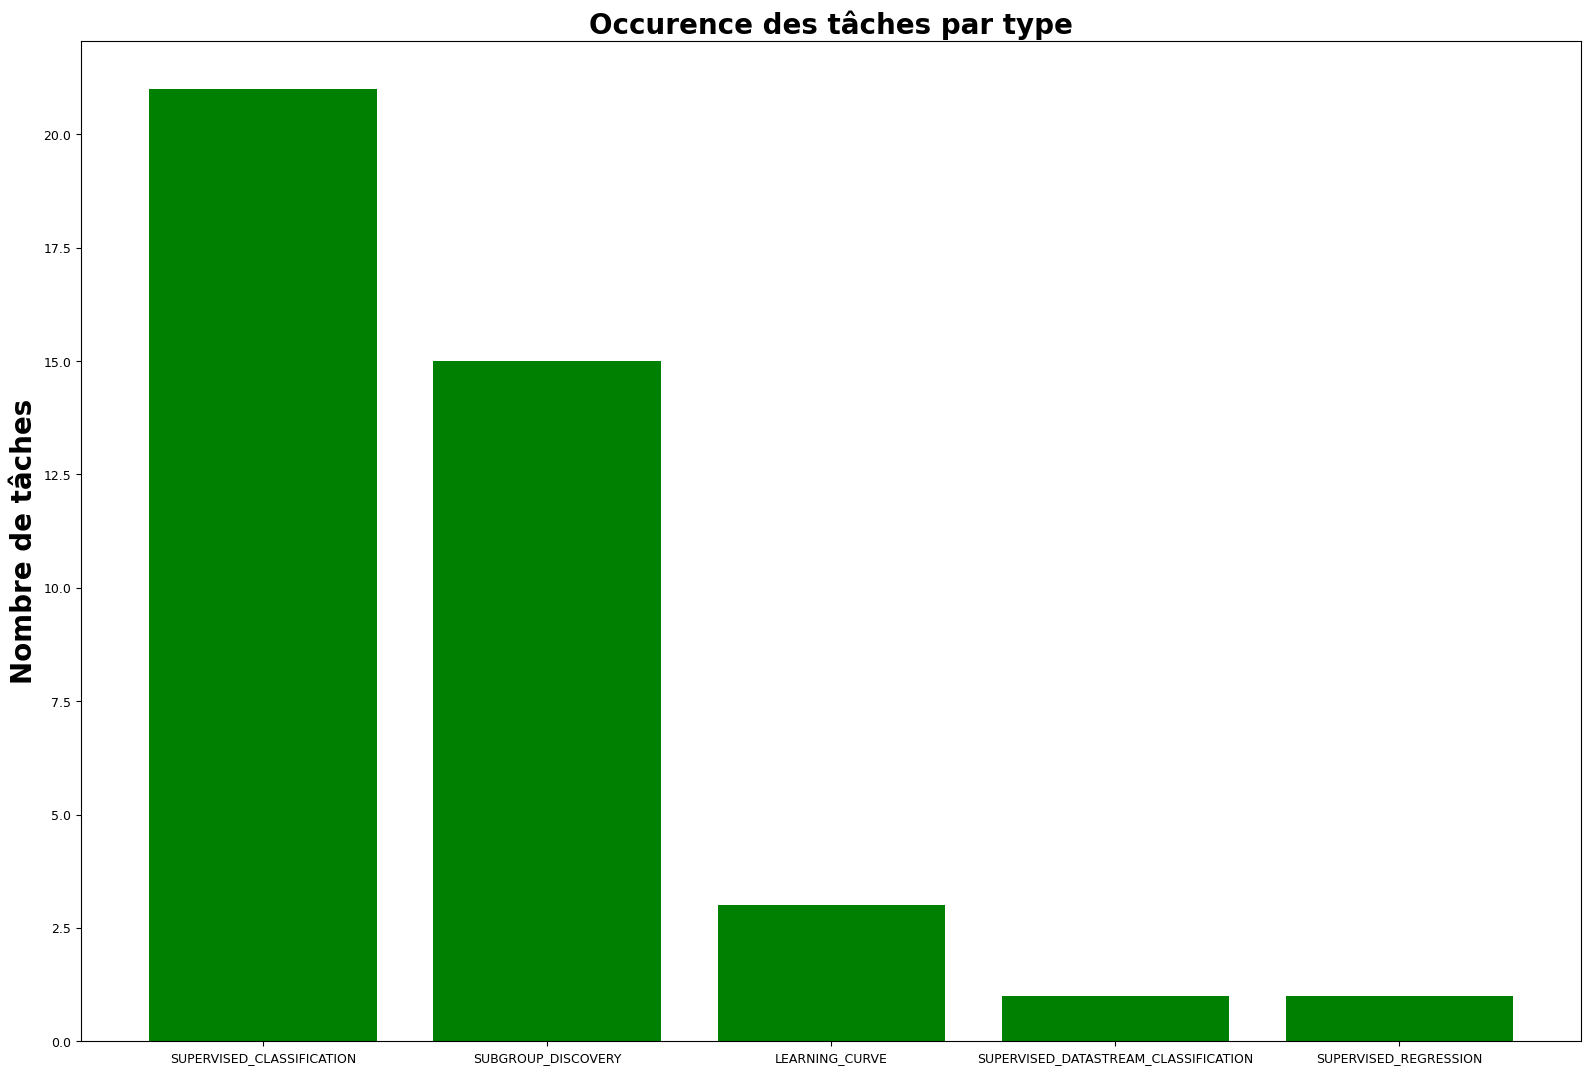

In [ ]:
font = {'size'   : 9}

plt.rc('font', **font)

fig_task_all = plt.figure()
ax_task_all = fig_task_all.add_axes([0, 0, 1, 1])
pprint.pprint(count_task_type.index)
x = [str(object_name.name) for object_name in count_task_type.index]
pprint.pprint(count_task_type.array)
ax_task_all.bar(x, count_task_type.array,
                width=0.8, color=['green'])
ax_task_all.set_ylabel('Nombre de tâches', weight='bold', size=20)
ax_task_all.set_title("Occurence des tâches par type", weight='bold', size=20)
fig_task_all.set_size_inches(15, 10, forward=True)
fig_task_all.set_dpi(100)
plt.savefig('task_type.png')
plt.show()

## Quels sont les algorithmes et prétraitements les plus fréquemment utilisés ? Peut-on identifier des sous-workflows, des occurrences conjointes des mêmes algorithmes ?

### [JapaneseVowels](https://www.openml.org/d/375)

In [ ]:
"""
Obtient les flows associés à tous les runs d'un dataset
"""
dataset = ml.datasets.get_dataset(375)
pprint.pprint(dataset)

tasks_jp_v = ml.tasks.list_tasks(data_id=dataset.id)
# pprint.pprint(tasks_japanese_vowels)

runs_jp_v = ml.runs.list_runs(task=list(tasks_jp_v.keys()))

flow_ids = sorted(list([runs_jp_v[r]['flow_id'] for r in runs_jp_v]))
print(f"Nombre d'identifiants de flow : {len(flow_ids)}")

run_ids_test = []
for r in runs_jp_v :
  isIn = False
  for f in run_ids_test:
    if runs_jp_v[r]['flow_id'] == f['flow_id'] and runs_jp_v[r]['task_id'] == f['task_id'] and runs_jp_v[r]['uploader'] == f['uploader'] :
      isIn = True
      break
  if not isIn :    
    run_ids_test.append(runs_jp_v[r])

flow_ids = sorted(list([r['flow_id'] for r in run_ids_test]))
print(f"Nombre d'identifiants de flow : {len(flow_ids)}")


# Récupère les flow et sous flow en réalisant une liste de chaque possibilité
# flows = [openml.flows.get_flow(fid) for fid, i in zip(flow_ids, range(10))]  # LIMITED RANGE
flows = [ml.flows.get_flow(fid) for fid in flow_ids]

pd.DataFrame(flows).to_json(path_or_buf='/content/flows_JapaneseVowels.json',orient='index')
    

def search_flow_root(flow: OpenMLFlow) :
    """
    Parcours en profondeur de tous les flows et leur composants
    """
    ft = {flow.flow_id: []}

    for f in flow.components:
        ft[flow.flow_id].append(search_flow_root(flow.components[f]))

    return ft if ft[flow.flow_id] else flow.flow_id


flow_tree = [search_flow_root(ff) for ff in flows]
pprint.pprint(flow_tree)
pd.DataFrame(flow_tree).to_json(path_or_buf='/content/result_flows_tree_JapaneseVowels.json',orient='index')

OpenML Dataset
Name..........: JapaneseVowels
Version.......: 1
Format........: ARFF
Upload Date...: 2014-09-27 10:56:03
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/52415/JapaneseVowels.arff
OpenML URL....: https://www.openml.org/d/375
# of features.: 15
# of instances: 9961
Nombre d'identifiants de flow : 23117
Nombre d'identifiants de flow : 488
[375,
 {376: [377]},
 {378: [379]},
 {385: [386]},
 {387: [388]},
 389,
 390,
 391,
 392,
 {398: [399]},
 {404: [389]},
 {405: [365]},
 {406: [390]},
 {407: [408]},
 {411: [412]},
 {413: [{414: [377]}]},
 {417: [380]},
 {418: [375]},
 {419: [391]},
 {420: [421]},
 {422: [379]},
 {423: [{424: [386]}]},
 {471: [377]},
 {482: [377]},
 {506: [365, 507]},
 {523: [365]},
 {523: [365]},
 {524: [390]},
 {524: [390]},
 {527: [412]},
 {528: [{414: [377]}]},
 {529: [416]},
 {530: [380]},
 {531: [375]},
 {532: [391]},
 {533: [421]},
 {534: [{424: [386]}]},
 {583: [377]},
 584,
 {585: [{586: [365]}]},
 {589: [364]},
 {59

### Tous les datasets

In [ ]:
"""
Obtient la liste des tâches
"""
list_data_set = [375, 377, 694, 40, 679, 382, 1484, 1477, 492, 381]
tasks = pd.DataFrame()
for dataset in list_data_set:
    tasks_append = pd.DataFrame.from_dict(
        ml.tasks.list_tasks(data_id=dataset),
        orient="index"
    )
    tasks = tasks.append(tasks_append)
print("Nombre de tâches : ")
print(len(tasks))
#pprint.pprint(tasks)

"""
Obtient la liste des run pour les id de tâche donné
"""
runs_all = ml.runs.list_runs(task=tasks['tid'].tolist())
print("Tous les runs : ")
#pprint.pprint(runs_all)
print("Nombres de runs :")
pprint.pprint(len(runs_all))

flow_ids = sorted(list([runs_all[r]['flow_id'] for r in runs_all]))
print(f"Nombre d'identifiants de flow : {len(flow_ids)}")

run_ids_test = []
for r in runs_all :
  isIn = False
  for f in run_ids_test:
    if runs_all[r]['flow_id'] == f['flow_id'] and runs_all[r]['task_id'] == f['task_id'] and runs_all[r]['uploader'] == f['uploader'] :
      isIn = True
      break
  if not isIn :    
    run_ids_test.append(runs_all[r])

flow_ids = sorted(list([r['flow_id'] for r in run_ids_test]))
print(f"Nombre d'identifiants de flow : {len(flow_ids)}")

# Récupère les flow et sous flow en réalisant une liste de chaque possibilité
# flows = [openml.flows.get_flow(fid) for fid, i in zip(flow_ids, range(10))]  # LIMITED RANGE
flows = [ml.flows.get_flow(fid) for fid in flow_ids]

pd.DataFrame(flows).to_json(path_or_buf='/content/flows_All_Times_Series.json',orient='index')

def search_flow_root(flow: OpenMLFlow) :
    """
    Parcours en profondeur de tous les flows et leur composants
    """
    ft = {flow.flow_id: []}

    for f in flow.components:
        ft[flow.flow_id].append(search_flow_root(flow.components[f]))

    return ft if ft[flow.flow_id] else flow.flow_id


flow_tree = [search_flow_root(ff) for ff in flows]
pprint.pprint(flow_tree)

pd.DataFrame(flow_tree).to_json(path_or_buf='/content/result_flows_tree_All_Times_Series.json',orient='index')

Nombre de tâches : 
220
Tous les runs : 
Nombres de runs :
47854
Nombre d'identifiants de flow : 47854
Nombre d'identifiants de flow : 2708
[56,
 56,
 56,
 56,
 56,
 56,
 57,
 57,
 57,
 58,
 59,
 59,
 60,
 60,
 60,
 61,
 61,
 62,
 62,
 63,
 63,
 64,
 65,
 65,
 66,
 66,
 66,
 {67: [68]},
 {67: [68]},
 {70: [71]},
 {70: [71]},
 {72: [73]},
 {72: [73]},
 {72: [73]},
 74,
 74,
 {75: [62]},
 {75: [62]},
 {76: [61]},
 {76: [61]},
 {76: [61]},
 {77: [62]},
 {77: [62]},
 {77: [62]},
 78,
 79,
 80,
 81,
 {82: [81]},
 {83: [80]},
 {84: [80]},
 {85: [80]},
 {86: [80]},
 {87: [80]},
 90,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 {99: [100]},
 {101: [102]},
 {103: [104]},
 105,
 {106: [107]},
 {108: [{109: [110]}]},
 119,
 120,
 121,
 124,
 126,
 130,
 {131: [62]},
 {133: [60, 134, 135]},
 {136: [137]},
 {138: [56]},
 {139: [60, 140]},
 {141: [74]},
 {142: [69]},
 {143: [56]},
 {144: [64]},
 {145: [61]},
 {147: [56]},
 {148: [135]},
 150,
 151,
 {154: [62]},
 {156: [60]},
 {159: [160]},
 160,
 {163: [164

Compter les occcurence des flows

In [ ]:
def count_occurence(flows_list):
    counter = dict()

    if isinstance(flows_list, list):
        for f in flows_list:
            c = count_occurence(f)
            for o in c:
                if o in counter:
                    counter[o] += c[o]
                else:
                    counter[o] = c[o]
    elif isinstance(flows_list, dict):
        for f in flows_list:
            c = count_occurence([f] + flows_list[f])
            for o in c:
                if o in counter:
                    counter[o] += c[o]
                else:
                    counter[o] = c[o]
    else:
        counter[flows_list] = 1

    return counter

flow_occurence = count_occurence(flow_tree)
sorted_flow_occurence = sorted(flow_occurence.items(), key=lambda t: t[1], reverse= True)
pprint.pprint(sorted_flow_occurence)

pd.DataFrame(sorted_flow_occurence).to_json(path_or_buf='/content/result_sorted_flow_occurence_All_Times_Series.json',orient='index')

save_sorted_flow_occurence_onTM = sorted_flow_occurence

[(1090, 113),
 (1068, 98),
 (377, 55),
 (1069, 49),
 (1077, 48),
 (365, 35),
 (1154, 34),
 (390, 32),
 (1720, 31),
 (380, 30),
 (1097, 30),
 (1729, 30),
 (1168, 27),
 (1169, 27),
 (1164, 26),
 (386, 25),
 (1724, 24),
 (1745, 24),
 (2118, 24),
 (1820, 23),
 (375, 22),
 (421, 22),
 (8778, 22),
 (8779, 22),
 (8780, 22),
 (8781, 22),
 (8782, 22),
 (1175, 21),
 (364, 20),
 (1110, 20),
 (1721, 20),
 (391, 19),
 (389, 18),
 (1191, 18),
 (379, 17),
 (1105, 17),
 (1112, 17),
 (1165, 17),
 (1172, 17),
 (1194, 17),
 (135, 16),
 (414, 16),
 (424, 16),
 (1080, 16),
 (1185, 16),
 (1728, 16),
 (2049, 16),
 (2050, 16),
 (8775, 16),
 (8776, 16),
 (8777, 16),
 (1070, 15),
 (1071, 15),
 (1073, 15),
 (1074, 15),
 (1075, 15),
 (1076, 15),
 (1078, 15),
 (1079, 15),
 (1084, 15),
 (1087, 15),
 (1088, 15),
 (1091, 15),
 (1094, 15),
 (1096, 15),
 (1098, 15),
 (1100, 15),
 (1101, 15),
 (1103, 15),
 (1104, 15),
 (1106, 15),
 (1108, 15),
 (1117, 15),
 (1155, 15),
 (1156, 15),
 (1177, 15),
 (1178, 15),
 (1179, 15),

Graph flow plus utilisé

In [ ]:
def build_flow_name(fid) :
  flow = ml.flows.get_flow(fid)
  return str(flow.name) + '.V'+ str(flow.version)


flow_ids_sorted_flow_occurence = [a for a, _ in sorted_flow_occurence[0:5]]
nb_used_flow_sorted_flow_occurence = [b for _, b in sorted_flow_occurence[0:5]]
flow_name_sorted_flow_occurence = [build_flow_name(fid) for fid in flow_ids_sorted_flow_occurence]
pprint.pprint(flow_ids_sorted_flow_occurence)
print('------------')
pprint.pprint(nb_used_flow_sorted_flow_occurence)
print('------------')
pprint.pprint(flow_name_sorted_flow_occurence)

[1090, 1068, 377, 1069, 1077]
------------
[113, 98, 55, 49, 48]
------------
['weka.DecisionStump.V4',
 'weka.J48.V28',
 'weka.DecisionStump.V2',
 'weka.ZeroR.V8',
 'weka.REPTree.V9']


Index([           TaskType.SUPERVISED_CLASSIFICATION,
                         TaskType.SUBGROUP_DISCOVERY,
                             TaskType.LEARNING_CURVE,
       TaskType.SUPERVISED_DATASTREAM_CLASSIFICATION,
                      TaskType.SUPERVISED_REGRESSION],
      dtype='object')
<PandasArray>
[21, 15, 3, 1, 1]
Length: 5, dtype: int64


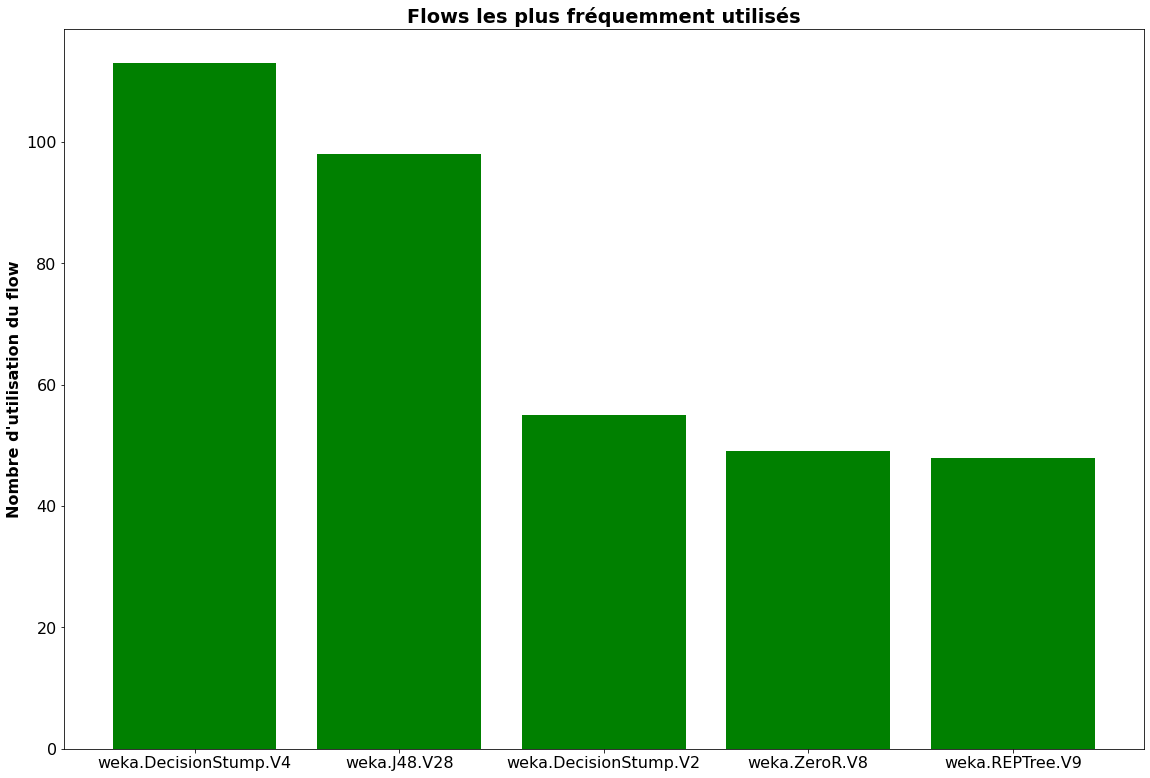

In [ ]:
font = {'size'   : 16}
plt.rc('font', **font)

fig_flow_used_all = plt.figure()
ax_flow_used_all = fig_flow_used_all.add_axes([0, 0, 1, 1])
pprint.pprint(count_task_type.index)
pprint.pprint(count_task_type.array)
ax_flow_used_all.bar(flow_name_sorted_flow_occurence, nb_used_flow_sorted_flow_occurence,
                width=0.8, color=['green'])
ax_flow_used_all.set_ylabel("Nombre d'utilisation du flow", weight='bold')
ax_flow_used_all.set_title("Flows les plus fréquemment utilisés", weight='bold')
fig_flow_used_all.set_size_inches(15, 10, forward=True)
# fig_flow_used_all.set_dpi(100)
plt.savefig('flow_use.png')
plt.show()

Relation des sous flow

In [ ]:
# Sub-relations
unique_flow_tree = [i for n, i in enumerate(flow_tree) if i not in flow_tree[n + 1:]]
# pprint.pprint(unique_flow_tree)


pd.DataFrame(unique_flow_tree).to_json(path_or_buf='/content/result_unique_flow_tree_All_Times_Series.json',orient='index')

def count_link(flows_list, co_x):
    if isinstance(flows_list, list):
        for x in flows_list:
          if isinstance(x, dict):
            count_link(x, co_x)
          for y in flows_list:
            x = list(x.keys())[0] if isinstance(x, dict) else x
            y = list(y.keys())[0] if isinstance(y, dict) else y
            if x != y:
              co_x[x][y] += 1
    elif isinstance(flows_list, dict):
        for k in flows_list:
          count_link(flows_list[k], co_x)
    return co_x

# Build edge list
co_x = {}
for f_id, _ in sorted_flow_occurence:
  co_x[f_id] = {ff_id:0 for ff_id, _ in sorted_flow_occurence if ff_id != f_id}
# search edge between nodes
for p in unique_flow_tree:
  count_link(p, co_x)
# pprint.pprint(co_x)

### Graphique concernant l'occurrence conjointe de sous flow

In [ ]:
g = nx.Graph()

for fid, occ in sorted_flow_occurence:
    g.add_node(fid, size = occ)# For each co-appearance between two characters, add an edge


for fid in co_x:
    for co_fid in co_x[fid]:
        # Only add edge if the count is positive
        if co_x[fid][co_fid] > 0:
            g.add_edge(fid, co_fid, weight = co_x[fid][co_fid])

# Get positions for the nodes in G
pos_ = nx.spring_layout(g)

# Custom function to create an edge between node x and node y, with a given text and width
def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')
    
# For each edge, make an edge_trace, append to list
edge_trace = []
for edge in g.edges():
    
    if g.edges()[edge]['weight'] > 0:
        f1 = edge[0]
        f2 = edge[1]
        x0, y0 = pos_[f1]
        x1, y1 = pos_[f2]
        text   = str(f1) + '--' + str(f2) + ': ' + str(g.edges()[edge]['weight'])
        
        trace  = make_edge([x0, x1, None], [y0, y1, None], text, 
                           width = 0.3*g.edges()[edge]['weight']**1.75)
        edge_trace.append(trace)

# Make a node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 10,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(symbol='circle-dot',
                                         color = [1,100],
                                         colorscale = 'Blackbody',
                                         size  = [],
                                         line=dict(color='rgb(50,50,50)', width=0.5)
                                    ))
                        
# For each node in midsummer, get the position and size and add to the node_trace
for node in g.nodes():
    x, y = pos_[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    # node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['marker']['size'] += tuple([g.nodes()[node]['size']])
    node_trace['text'] += tuple(['<b>' + str(node) + '</b>'])

In [ ]:
# Customize layout
layout = go.Layout(
    paper_bgcolor='rgba(255,255,255,255)', # transparent background
    plot_bgcolor='rgba(255,255,255,255)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
)# Create figure
fig = go.Figure(layout = layout)# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)# Add node trace
fig.add_trace(node_trace)# Remove legend
fig.update_layout(showlegend = False)# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)# Show figure
fig.show()
fig.write_html("graph_occurrence_conjointe.html")

### Graphique concernant l'occurence conjointe filtrée de sous flow

In [ ]:
def filtre(fid, occ) :
  link = False
  for co_fid in co_x[fid]:
    # Only add edge if the count is positive
    if co_x[fid][co_fid] > 0:
      link = True 
  if occ > 20 :
    return True
  else :
    return link

In [ ]:
g = nx.Graph()

for fid, occ in sorted_flow_occurence:
  if filtre(fid, occ) :
    g.add_node(fid, size = occ)# For each co-appearance between two characters, add an edge


for fid in co_x:
    for co_fid in co_x[fid]:
        # Only add edge if the count is positive
        if co_x[fid][co_fid] > 0:
            g.add_edge(fid, co_fid, weight = co_x[fid][co_fid])

# Get positions for the nodes in G
pos_ = nx.spring_layout(g)

# Custom function to create an edge between node x and node y, with a given text and width
def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')
    
# For each edge, make an edge_trace, append to list
edge_trace = []
for edge in g.edges():
    
    if g.edges()[edge]['weight'] > 0:
        f1 = edge[0]
        f2 = edge[1]
        x0, y0 = pos_[f1]
        x1, y1 = pos_[f2]
        text   = str(f1) + '--' + str(f2) + ': ' + str(g.edges()[edge]['weight'])
        
        trace  = make_edge([x0, x1, None], [y0, y1, None], text, 
                           width = 0.3*g.edges()[edge]['weight']**1.75)
        edge_trace.append(trace)

# Make a node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 10,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(symbol='circle-dot',
                                         color = [1,100],
                                         colorscale = 'Blackbody',
                                         size  = [],
                                         line=dict(color='rgb(50,50,50)', width=0.5)
                                    ))
                        
# For each node in midsummer, get the position and size and add to the node_trace
for node in g.nodes():
    x, y = pos_[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    # node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['marker']['size'] += tuple([g.nodes()[node]['size']])
    node_trace['text'] += tuple(['<b>' + str(node) + '</b>'])

In [ ]:
# Customize layout
layout = go.Layout(
    paper_bgcolor='rgba(255,255,255,255)', # transparent background
    plot_bgcolor='rgba(255,255,255,255)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
)# Create figure
fig = go.Figure(layout = layout)# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)# Add node trace
fig.add_trace(node_trace)# Remove legend
fig.update_layout(showlegend = False)# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)# Show figure
fig.show()
fig.write_html("graph_occurrence_conjointe_filtré.html")

## Existe-t-il des algorithmes qui ne sont utilisés que sur les séries temporelles ?


In [ ]:
"""
Obtient la liste des tâches
"""
list_data_set_not_time_series = [1464, 334, 307, 1166, 300]
tasks_not_time_series = pd.DataFrame()
for dataset in list_data_set_not_time_series:
    tasks_append_not_time_series = pd.DataFrame.from_dict(
        ml.tasks.list_tasks(data_id=dataset),
        orient="index"
    )
    tasks_not_time_series = tasks_not_time_series.append(tasks_append_not_time_series)
print("Nombre de tâches : ")
print(len(tasks_not_time_series))
#pprint.pprint(tasks_not_time_series)


tasks_not_time_series.to_json(path_or_buf='/content/tasks_all_not_time_series.json',orient='index')

"""
Obtient la liste des run pour les id de tâche donné
"""
runs_all_not_time_series = ml.runs.list_runs(task=tasks_not_time_series['tid'].tolist())
#runs = ml.runs.list_runs(task=tasks_not_time_series['tid'].tolist())
#runs = pd.DataFrame.from_dict(runs, orient="index")
print("Tous les runs : ")
#pprint.pprint(runs_all_not_time_series)
print("Nombres de runs :")
pprint.pprint(len(runs_all_not_time_series))

pd.DataFrame(runs_all_not_time_series).to_json(path_or_buf='/content/runs_all_not_time_series.json',orient='index')

# pprint.pp(runs_all_not_time_series[x].flow_id)
#flow_ids = sorted(list(set([runs_all_not_time_series[r]['flow_id'] for r in runs_all_not_time_series])))
flow_ids = sorted(list([runs_all_not_time_series[r]['flow_id'] for r in runs_all_not_time_series]))
print(f"Nombre d'identifiants de flow : {len(flow_ids)}")

run_ids_test = []
for r in runs_all_not_time_series :
  isIn = False
  for f in run_ids_test:
    if runs_all_not_time_series[r]['flow_id'] == f['flow_id'] and runs_all_not_time_series[r]['task_id'] == f['task_id'] and runs_all_not_time_series[r]['uploader'] == f['uploader'] :
      isIn = True
      break
  if not isIn :    
    run_ids_test.append(runs_all_not_time_series[r])

flow_ids = sorted(list([r['flow_id'] for r in run_ids_test]))
print(f"Nombre d'identifiants de flow : {len(flow_ids)}")

# Récupère les flow et sous flow en réalisant une liste de chaque possibilité
# flows = [openml.flows.get_flow(fid) for fid, i in zip(flow_ids, range(10))]  # LIMITED RANGE
flows = [ml.flows.get_flow(fid) for fid in flow_ids]

pd.DataFrame(flows).to_json(path_or_buf='/content/flows_all_not_time_series.json',orient='index')

# pprint.pp(flows)

flow_tree = [search_flow_root(ff) for ff in flows]
pprint.pprint(flow_tree)

pd.DataFrame(flow_tree).to_json(path_or_buf='/content/result_flow_tree_all_not_time_series.json',orient='index')

Nombre de tâches : 
265
Tous les runs : 
Nombres de runs :
940177
Nombre d'identifiants de flow : 940177
Nombre d'identifiants de flow : 2708
[364,
 364,
 364,
 375,
 375,
 375,
 {376: [377]},
 {376: [377]},
 {376: [377]},
 {378: [379]},
 {378: [379]},
 {378: [379]},
 380,
 380,
 384,
 384,
 {385: [386]},
 {385: [386]},
 {385: [386]},
 {387: [388]},
 {387: [388]},
 {387: [388]},
 389,
 389,
 389,
 390,
 390,
 390,
 391,
 391,
 392,
 {394: [395]},
 {394: [395]},
 {398: [399]},
 {398: [399]},
 {404: [389]},
 {404: [389]},
 {404: [389]},
 {405: [365]},
 {405: [365]},
 {405: [365]},
 {406: [390]},
 {406: [390]},
 {406: [390]},
 {407: [408]},
 {407: [408]},
 {407: [408]},
 {411: [412]},
 {411: [412]},
 {411: [412]},
 {413: [{414: [377]}]},
 {413: [{414: [377]}]},
 {413: [{414: [377]}]},
 {417: [380]},
 {417: [380]},
 {417: [380]},
 {418: [375]},
 {418: [375]},
 {418: [375]},
 {419: [391]},
 {419: [391]},
 {419: [391]},
 {420: [421]},
 {420: [421]},
 {420: [421]},
 {422: [379]},
 {422: [379]

In [ ]:
flow_occurence = count_occurence(flow_tree)
sorted_flow_occurence = sorted(flow_occurence.items(), key=lambda t: t[1], reverse= True)
pprint.pprint(sorted_flow_occurence)

pd.DataFrame(sorted_flow_occurence).to_json(path_or_buf='/content/result_sorted_flow_occurence_all_not_time_series.json',orient='index')

[(9801, 146),
 (16169, 72),
 (15420, 67),
 (1720, 64),
 (1729, 62),
 (1724, 52),
 (1090, 50),
 (2118, 48),
 (1745, 47),
 (8778, 46),
 (8779, 46),
 (8780, 46),
 (8781, 46),
 (8782, 46),
 (1068, 42),
 (7644, 39),
 (7645, 39),
 (1721, 38),
 (4221, 38),
 (1725, 37),
 (1820, 37),
 (8775, 34),
 (8776, 34),
 (8777, 34),
 (1730, 32),
 (1726, 31),
 (2050, 31),
 (7646, 31),
 (2049, 30),
 (1728, 27),
 (6947, 27),
 (6948, 27),
 (6949, 27),
 (2133, 24),
 (2138, 24),
 (2082, 23),
 (7633, 23),
 (1805, 22),
 (12737, 22),
 (17377, 21),
 (377, 20),
 (1077, 20),
 (1719, 20),
 (1727, 20),
 (2231, 20),
 (17421, 20),
 (17422, 20),
 (17423, 20),
 (17424, 20),
 (17425, 20),
 (17426, 20),
 (17427, 20),
 (1069, 19),
 (1944, 18),
 (17407, 18),
 (13294, 17),
 (1718, 16),
 (2255, 16),
 (17405, 16),
 (7660, 15),
 (1154, 14),
 (365, 13),
 (7650, 13),
 (1097, 12),
 (1164, 12),
 (5508, 12),
 (6969, 12),
 (6902, 12),
 (8783, 12),
 (8812, 12),
 (8813, 12),
 (8816, 12),
 (17408, 12),
 (2228, 11),
 (2230, 11),
 (2267, 11)

In [ ]:
flow_ids_sorted_flow_occurence = [a for a, _ in sorted_flow_occurence[0:5]]
nb_used_flow_sorted_flow_occurence = [b for _, b in sorted_flow_occurence[0:5]]
flow_name_sorted_flow_occurence = [build_flow_name(fid) for fid in flow_ids_sorted_flow_occurence]
pprint.pprint(flow_ids_sorted_flow_occurence)
print('------------')
pprint.pprint(nb_used_flow_sorted_flow_occurence)
print('------------')
pprint.pprint(flow_name_sorted_flow_occurence)

[9801, 16169, 15420, 1720, 1729]
------------
[146, 72, 67, 64, 62]
------------
['sklearn.linear_model.logistic.LogisticRegression.V23',
 'sklearn.linear_model.logistic.LogisticRegression.V28',
 'sklearn.linear_model.logistic.LogisticRegression.V27',
 'weka.J48.V33',
 'weka.DecisionStump.V5']


Index([           TaskType.SUPERVISED_CLASSIFICATION,
                         TaskType.SUBGROUP_DISCOVERY,
                             TaskType.LEARNING_CURVE,
       TaskType.SUPERVISED_DATASTREAM_CLASSIFICATION,
                      TaskType.SUPERVISED_REGRESSION],
      dtype='object')
<PandasArray>
[21, 15, 3, 1, 1]
Length: 5, dtype: int64


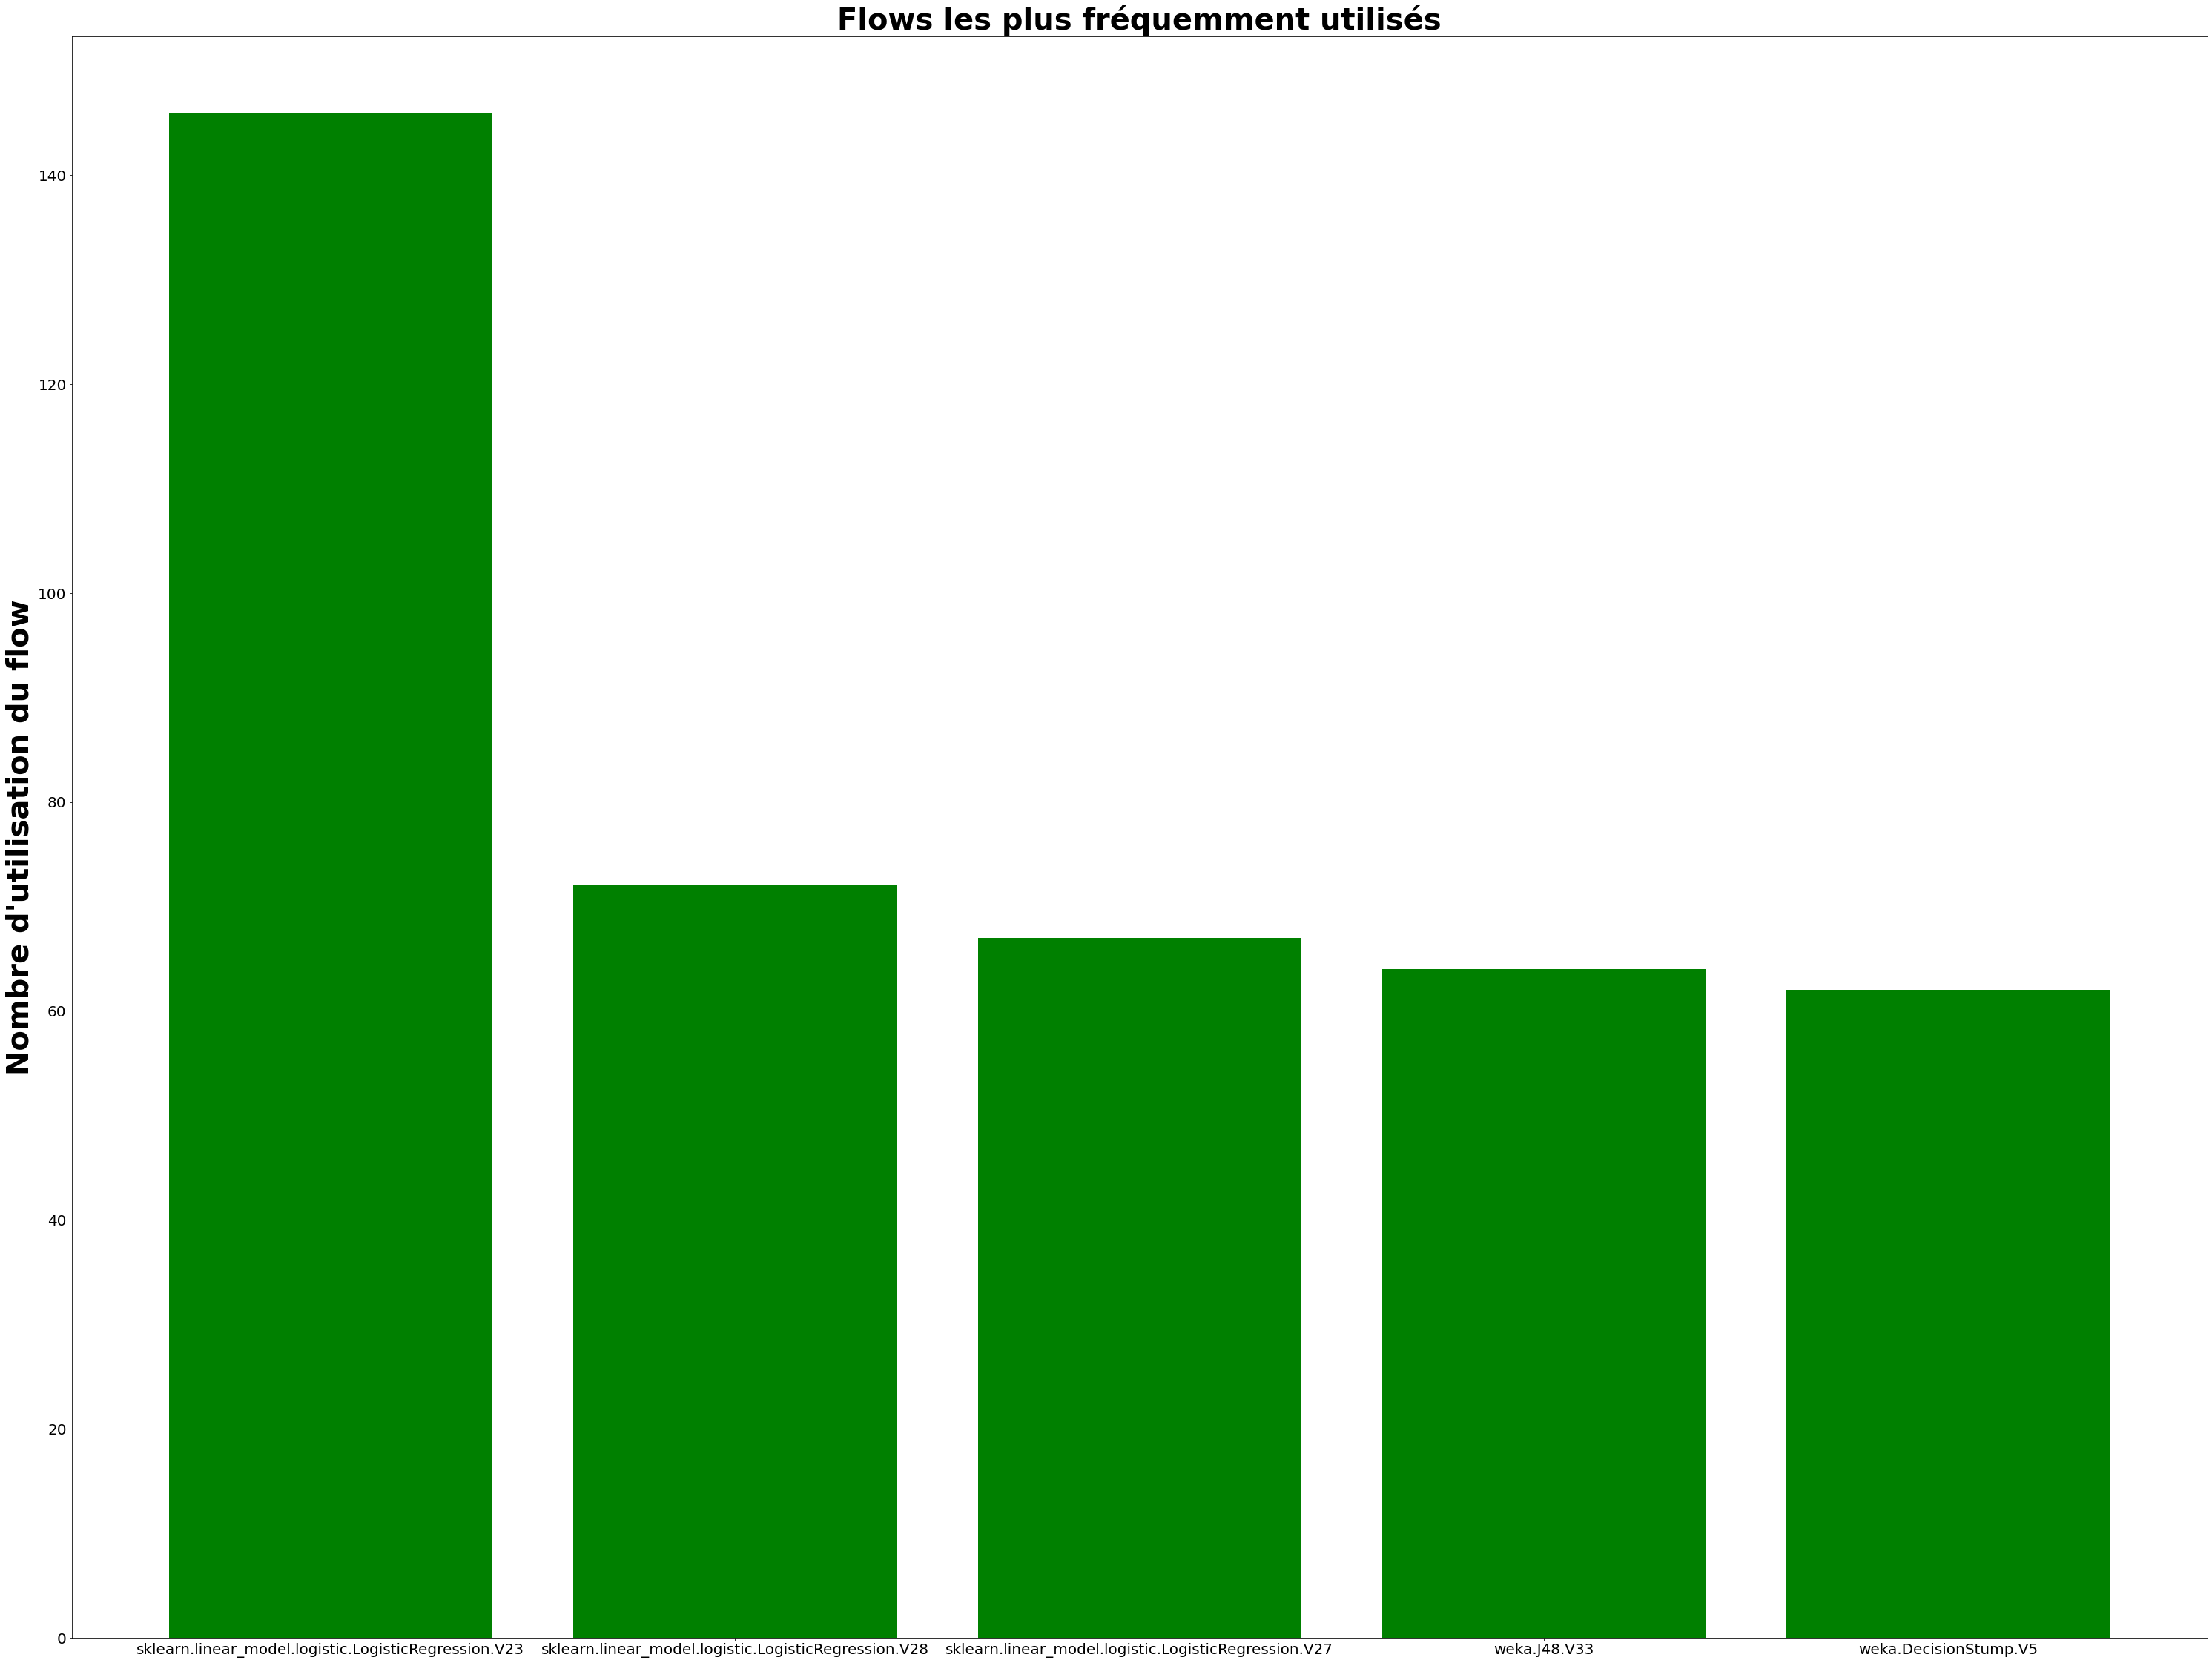

In [ ]:
font = {'size'   : 20}
plt.rc('font', **font)

fig_flow_used_all = plt.figure()
ax_flow_used_all = fig_flow_used_all.add_axes([0, 0, 1, 1])
pprint.pprint(count_task_type.index)
pprint.pprint(count_task_type.array)
ax_flow_used_all.bar(flow_name_sorted_flow_occurence, nb_used_flow_sorted_flow_occurence,
                width=0.8, color=['green'])
ax_flow_used_all.set_ylabel("Nombre d'utilisation du flow", weight='bold', size=40)
ax_flow_used_all.set_title("Flows les plus fréquemment utilisés", weight='bold', size=40)
fig_flow_used_all.set_size_inches(40, 30, forward=True)
# fig_flow_used_all.set_dpi(100)
plt.savefig('flow_use_general.png')
plt.show()

Recherche des flows à forte occurrence pour les times series dans les autres dataset

In [ ]:
pprint.pprint(save_sorted_flow_occurence_onTM)
print('------------')
pprint.pprint(sorted_flow_occurence)

[(1090, 113),
 (1068, 98),
 (377, 55),
 (1069, 49),
 (1077, 48),
 (365, 35),
 (1154, 34),
 (390, 32),
 (1720, 31),
 (380, 30),
 (1097, 30),
 (1729, 30),
 (1168, 27),
 (1169, 27),
 (1164, 26),
 (386, 25),
 (1724, 24),
 (1745, 24),
 (2118, 24),
 (1820, 23),
 (375, 22),
 (421, 22),
 (8778, 22),
 (8779, 22),
 (8780, 22),
 (8781, 22),
 (8782, 22),
 (1175, 21),
 (364, 20),
 (1110, 20),
 (1721, 20),
 (391, 19),
 (389, 18),
 (1191, 18),
 (379, 17),
 (1105, 17),
 (1112, 17),
 (1165, 17),
 (1172, 17),
 (1194, 17),
 (135, 16),
 (414, 16),
 (424, 16),
 (1080, 16),
 (1185, 16),
 (1728, 16),
 (2049, 16),
 (2050, 16),
 (8775, 16),
 (8776, 16),
 (8777, 16),
 (1070, 15),
 (1071, 15),
 (1073, 15),
 (1074, 15),
 (1075, 15),
 (1076, 15),
 (1078, 15),
 (1079, 15),
 (1084, 15),
 (1087, 15),
 (1088, 15),
 (1091, 15),
 (1094, 15),
 (1096, 15),
 (1098, 15),
 (1100, 15),
 (1101, 15),
 (1103, 15),
 (1104, 15),
 (1106, 15),
 (1108, 15),
 (1117, 15),
 (1155, 15),
 (1156, 15),
 (1177, 15),
 (1178, 15),
 (1179, 15),

In [ ]:
def search_occurrence(list_occurrence_TM, list_occurrence_other) :
  comparaison = {}
  for f, o in list_occurrence_TM :
    find_in_other = False
    if o > 15 :
      for f_other, o_other in list_occurrence_other :
        if f_other == f :
          find_in_other = True
          temp_res = {
              'tm' : o,
              'other' : o_other
          }
      if not find_in_other :
        temp_res = {
          'tm' : o,
          'other' : 0
        }
      comparaison[f] = temp_res
  return comparaison

comp = search_occurrence(save_sorted_flow_occurence_onTM, sorted_flow_occurence)
pprint.pprint(comp)

with open("result_comparaison_flow_occurrence.json", "x") as outfile:
    json.dump(comp, outfile)

{135: {'other': 0, 'tm': 16},
 364: {'other': 7, 'tm': 20},
 365: {'other': 13, 'tm': 35},
 375: {'other': 9, 'tm': 22},
 377: {'other': 20, 'tm': 55},
 379: {'other': 6, 'tm': 17},
 380: {'other': 10, 'tm': 30},
 386: {'other': 10, 'tm': 25},
 389: {'other': 6, 'tm': 18},
 390: {'other': 9, 'tm': 32},
 391: {'other': 8, 'tm': 19},
 414: {'other': 6, 'tm': 16},
 421: {'other': 10, 'tm': 22},
 424: {'other': 7, 'tm': 16},
 1068: {'other': 42, 'tm': 98},
 1069: {'other': 19, 'tm': 49},
 1077: {'other': 20, 'tm': 48},
 1080: {'other': 7, 'tm': 16},
 1090: {'other': 50, 'tm': 113},
 1097: {'other': 12, 'tm': 30},
 1105: {'other': 7, 'tm': 17},
 1110: {'other': 10, 'tm': 20},
 1112: {'other': 7, 'tm': 17},
 1154: {'other': 14, 'tm': 34},
 1164: {'other': 12, 'tm': 26},
 1165: {'other': 5, 'tm': 17},
 1168: {'other': 10, 'tm': 27},
 1169: {'other': 10, 'tm': 27},
 1172: {'other': 6, 'tm': 17},
 1175: {'other': 10, 'tm': 21},
 1185: {'other': 7, 'tm': 16},
 1191: {'other': 8, 'tm': 18},
 1194